<a href="https://colab.research.google.com/github/micah-shull/Data_Analysis/blob/main/DA_EDA_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
from scipy import stats
import dc_toolkit as dc
import da_toolkit as da

# Data Visuals Color
color='yellowgreen'
palette='crest'

### 1. **Data Overview**

- **Basic Info**: Use `df.info()` to get a concise summary of the DataFrame, including the number of non-null values in each column and the data type.
- **First Rows**: Display the first few rows using `df.head()` to get a feel for the data.
- **Summary Statistics**: Use `df.describe()` for a quick statistical summary of the numerical columns.

### 2. **Data Cleaning**

- **Missing Values**: Identify and handle missing values. Decide whether to impute, drop, or leave them as is, based on the context.
- **Data Types**: Ensure each column is of the correct data type (`df.dtypes`). Convert data types if necessary, e.g., converting objects to categorical data or timestamps.
- **Duplicates**: Check for and remove any duplicate rows.

### 3. **Univariate Analysis**

- **Numerical Features**: Visualize distributions using histograms or boxplots. Look for outliers or unusual distributions.
- **Categorical Features**: Use bar charts to understand the distribution of categorical variables. Check the count of each category.

### 4. **Bivariate/Multivariate Analysis**

- **Correlations**: Use correlation matrices and heatmaps to identify relationships between numerical features.
- **Pairwise Relationships**: Utilize pair plots to visualize pairwise relationships between numerical features, especially useful for small to medium-sized datasets.
- **Categorical Comparisons**: For categorical data, explore relationships using stacked bar charts, violin plots, or box plots, comparing against numerical outcomes.

### 5. **Feature Engineering and Selection**

- **New Features**: Based on your understanding of the dataset, create new features that might be useful for modeling.
- **Feature Selection**: Identify which features are most relevant to your target variable or modeling goals. Techniques include examining correlations or using feature importance from model outputs.

### 6. **Advanced Visualizations**

- **Time Series Analysis**: If dealing with time series data, plot time trends and look for seasonality, trends, and outliers.
- **Text Data**: For textual data, consider frequency distributions of words or topics.

### 7. **Exporting Processed Data**

- After cleaning and preprocessing, save your processed dataset for further analysis or modeling.

```python
df.to_csv('processed_dataset.csv', index=False)
```

### 8. **Documentation**

- **Code Comments**: Ensure your code is well-commented to explain why certain steps were taken.
- **Analysis Insights**: Document key findings and insights from each section of your EDA. This can be in the form of a report or inline comments in your notebook.

### 9. **Iterative Analysis**

- **Iterate as Needed**: EDA is not a linear process. You might need to go back and revisit earlier steps based on findings from later analyses.


## Data Import

In [ ]:
df = sns.load_dataset('mpg')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# 2. **Data Cleaning**

- **Missing Values**: Identify and handle missing values. Decide whether to impute, drop, or leave them as is, based on the context.
- **Data Types**: Ensure each column is of the correct data type (`df.dtypes`). Convert data types if necessary, e.g., converting objects to categorical data or timestamps.
- **Duplicates**: Check for and remove any duplicate rows.


### Categorical Data Identification

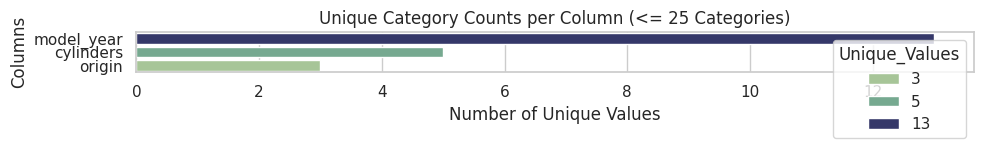

['model_year', 'cylinders', 'origin']


In [ ]:
category_counts_df, category_counts_list = dc.analyze_column_categories_auto(df,max_unique_values=25)
print(category_counts_list)

In [ ]:
category_counts_df

,Column,Unique_Values,Data_Type
4,weight,351,int64
8,name,305,object
0,mpg,129,float64
5,acceleration,95,float64
3,horsepower,93,float64
2,displacement,82,float64
6,model_year,13,int64
1,cylinders,5,int64
7,origin,3,object


### Categorical Data Conversion

In [ ]:
dc.convert_to_categorical(df,columns=category_counts_list)
df.drop(columns=['name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   origin        398 non-null    category
dtypes: category(3), float64(4), int64(1)
memory usage: 17.8 KB


# 3. **Univariate Analysis**

- **Numerical Features**: Visualize distributions using histograms or boxplots. Look for outliers or unusual distributions.
- **Categorical Features**: Use bar charts to understand the distribution of categorical variables. Check the count of each category.


In [ ]:
df.select_dtypes(include='number').columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

## Numeric Features

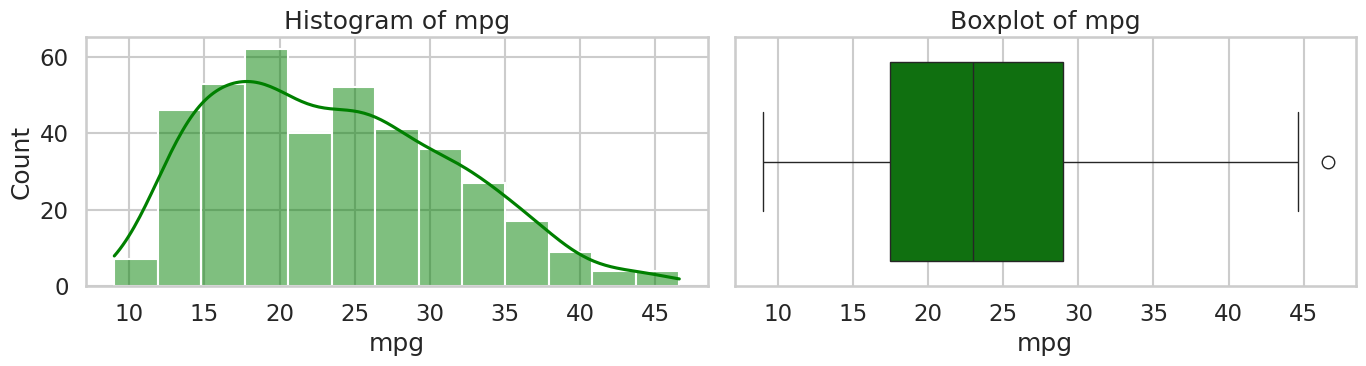

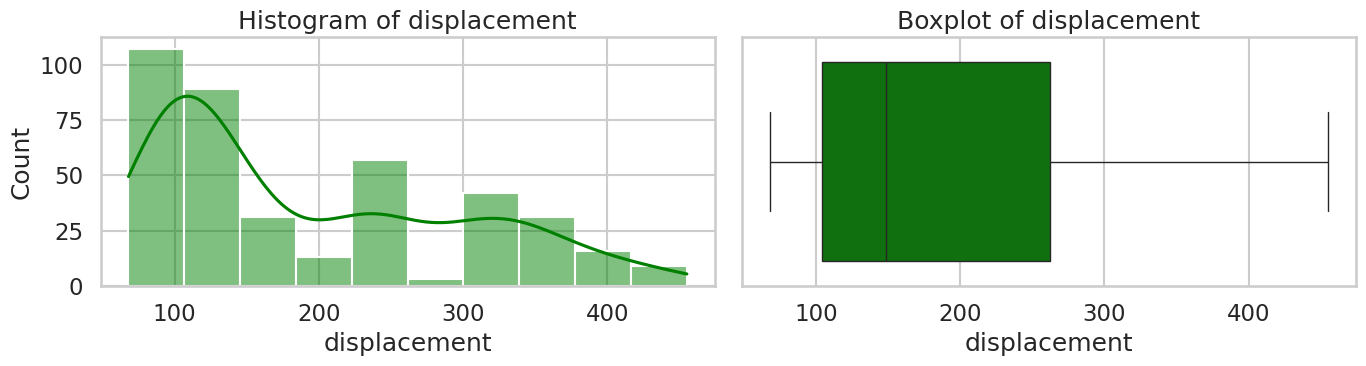

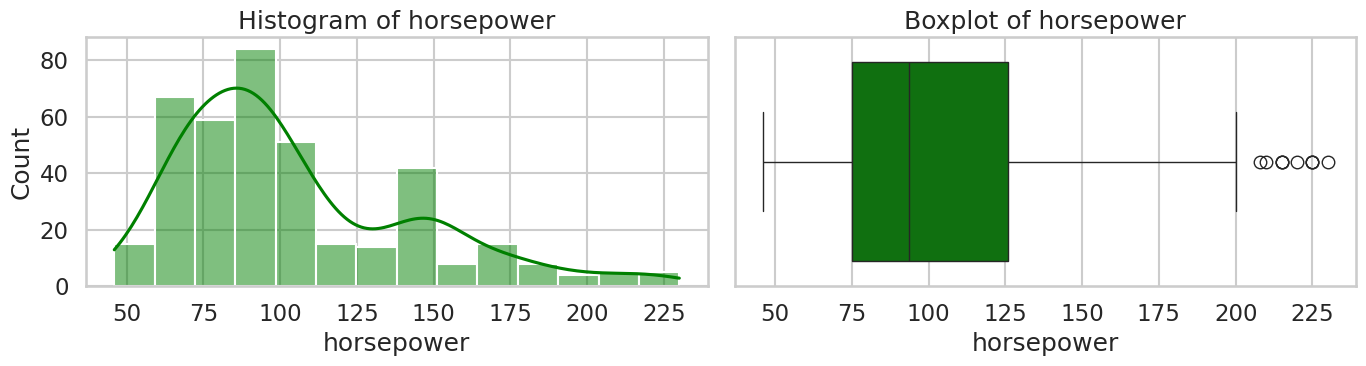

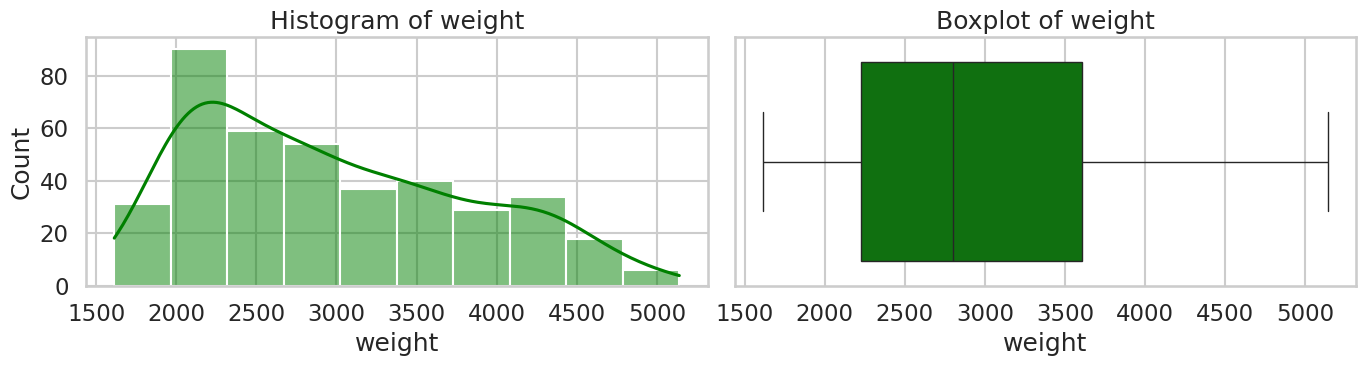

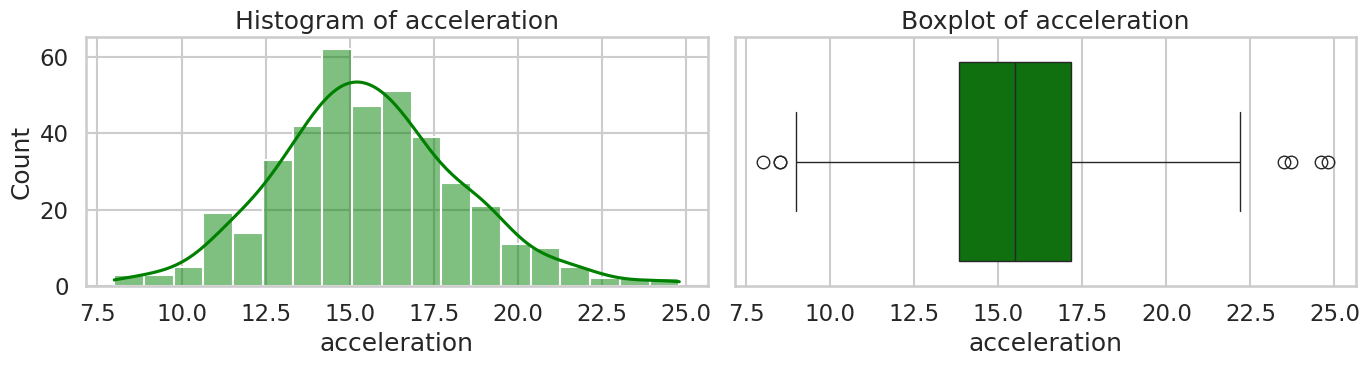

In [ ]:
da.visualize_numerical_features(df, df.select_dtypes(include='number').columns)

## Categorical Features

In [ ]:
df.select_dtypes(include='category').columns

Index(['cylinders', 'model_year', 'origin'], dtype='object')

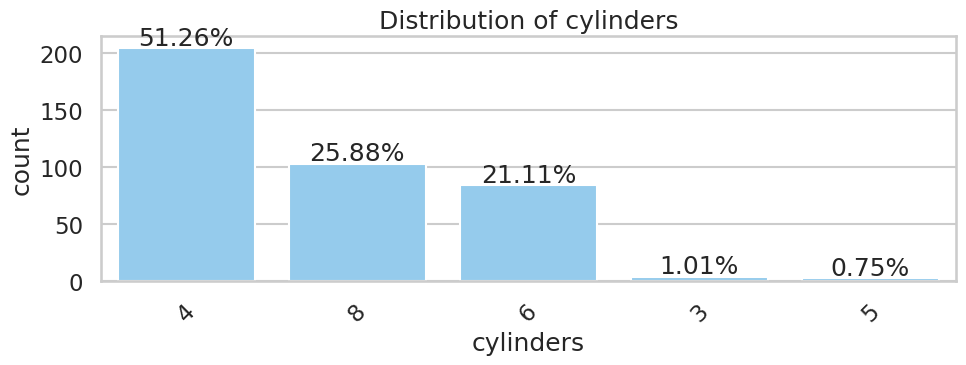

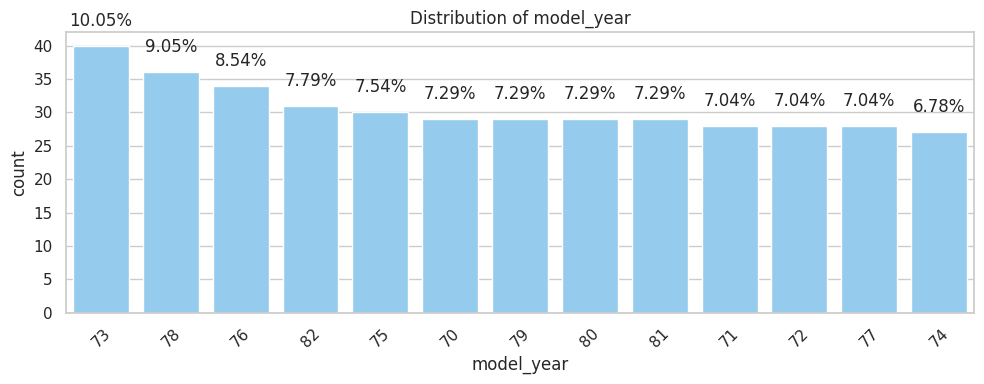

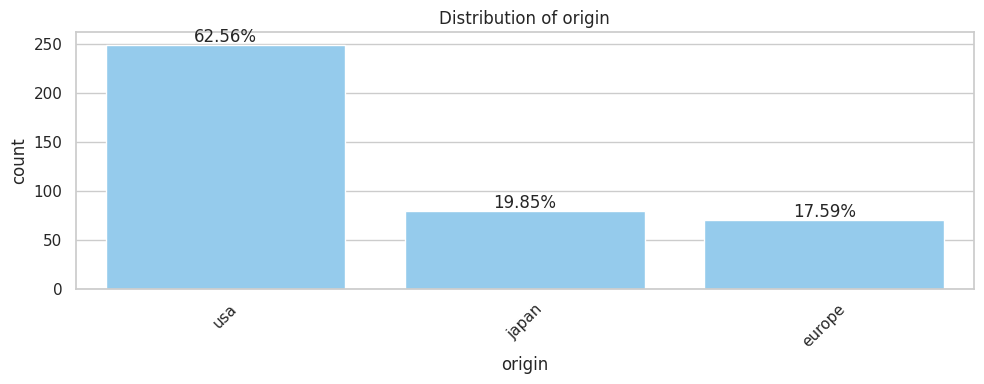

In [ ]:
da.visualize_categorical_features(df, df.select_dtypes(include='category').columns,color='lightskyblue')

# 4. **Bivariate/Multivariate Analysis**

- **Correlations**: Use correlation matrices and heatmaps to identify relationships between numerical features.
- **Pairwise Relationships**: Utilize pair plots to visualize pairwise relationships between numerical features, especially useful for small to medium-sized datasets.
- **Categorical Comparisons**: For categorical data, explore relationships using stacked bar charts, violin plots, or box plots, comparing against numerical outcomes.

### 1) Correlations: Correlation Matrices and Heatmaps

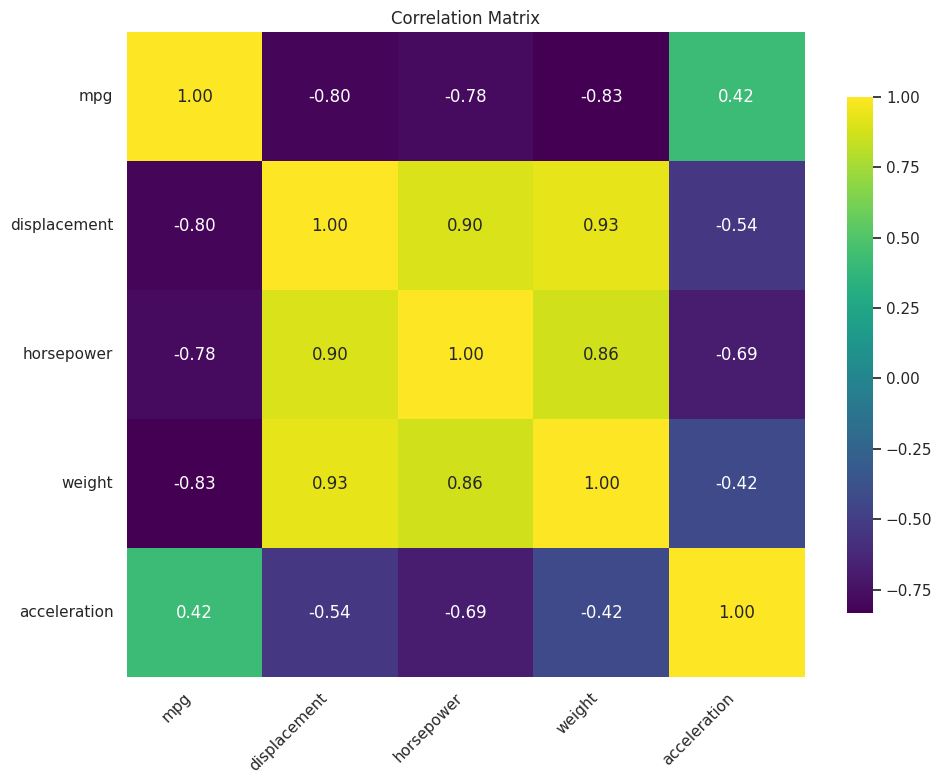

In [ ]:
# select diverging color palette or preset palette
# c = sns.diverging_palette(180, 250, s=60, as_cmap=True)
# c = sns.color_palette("Spectral", as_cmap=True)
c = sns.color_palette("viridis", as_cmap=True)

da.plot_correlation_matrix(df, method='pearson',cmap=c)

### 2) Pairwise Relationships: Pair Plots

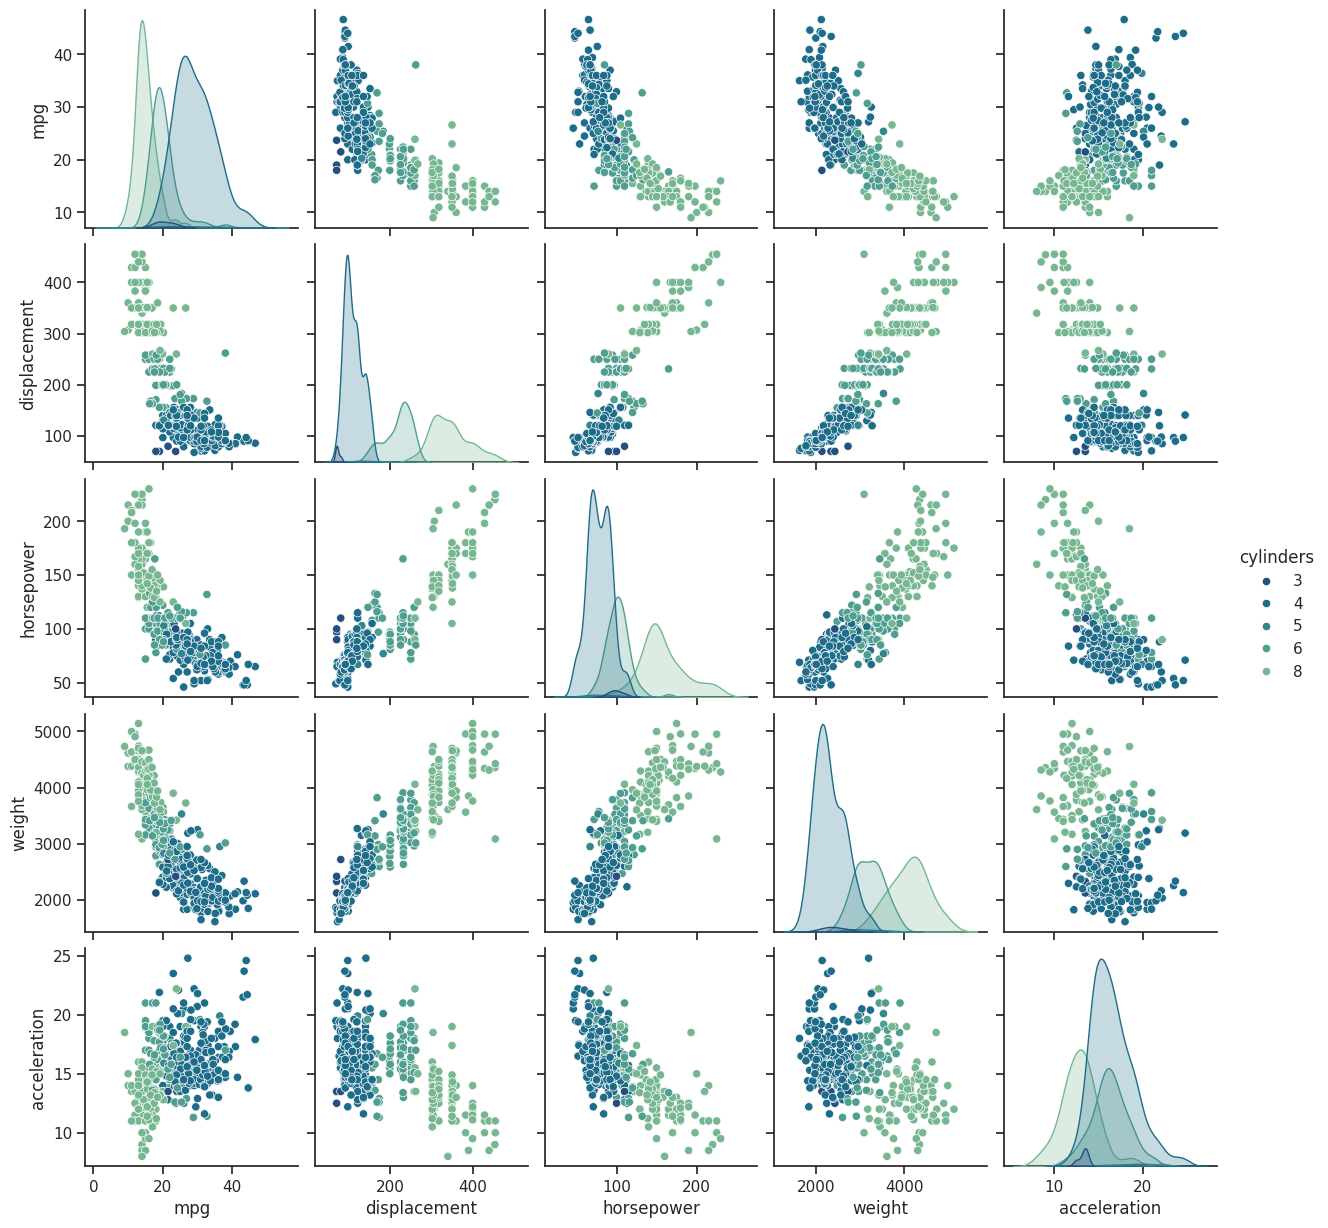

In [ ]:
# select numeric columns and single category
cols = df.select_dtypes(include='number').columns.tolist() + ['cylinders']
sns.set_style('ticks')
sns.pairplot(df[cols],hue='cylinders',palette='crest_r')
sns.set();

### 3) Categorical Comparisons: Stacked Bar Charts, Violin Plots, or Box Plots

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [ ]:
cat_cols = df.select_dtypes(include='category').columns
# cat_cols
cat_cols[0]

'cylinders'

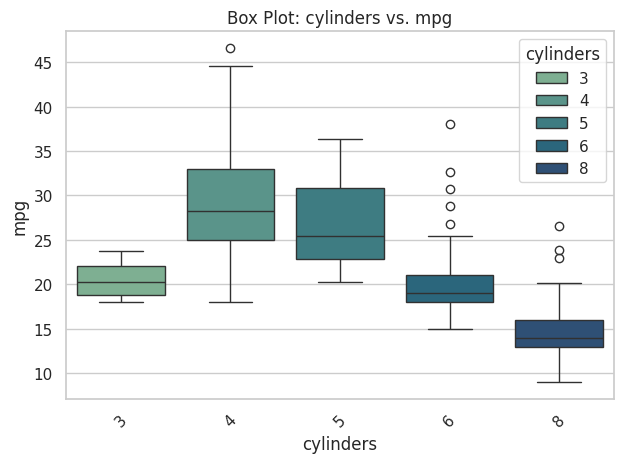

In [ ]:
da.plot_categorical_comparisons(df,categorical_column=cat_cols[0],
                                   numerical_column=num_cols[0], palette=palette)

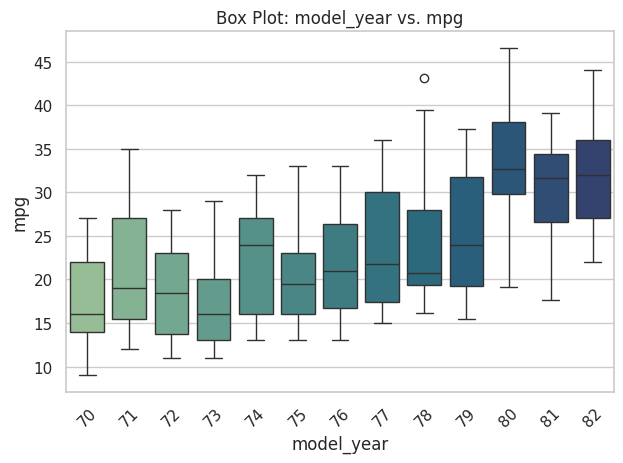

In [ ]:
da.plot_categorical_comparisons(df,categorical_column=cat_cols[1],
                                numerical_column=num_cols[0],
                                palette=palette,legend=False)

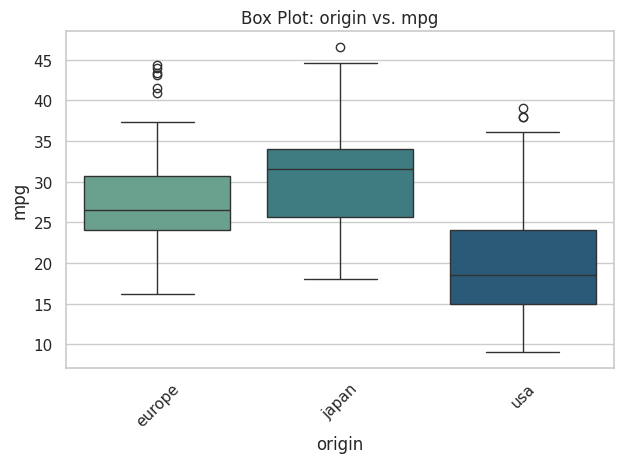

In [ ]:
da.plot_categorical_comparisons(df,categorical_column=cat_cols[2],
                                numerical_column=num_cols[0], legend=False)

# 5. **Feature Engineering and Selection**

- **New Features**: Based on your understanding of the dataset, create new features that might be useful for modeling.
- **Feature Selection**: Identify which features are most relevant to your target variable or modeling goals. Techniques include examining correlations or using feature importance from model outputs.

## Determine Bin Sizes

In [ ]:
feature_name = 'mpg'

mpg_bins = da.generate_bins(df, feature_name, start_adjust=-4, stop_adjust=6, step=5)

Proposed bins: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


Proposed bins: [5, 10, 15, 20, 25, 30, 35, 40, 45]


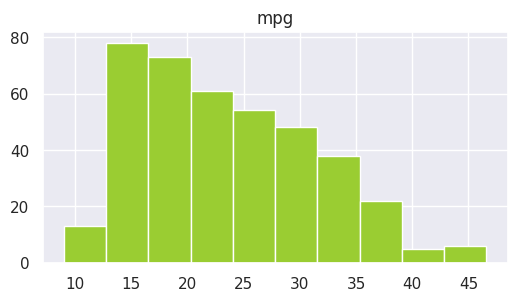

In [ ]:
# visualize the distribution
feature = cols[0]
df[feature].hist(figsize=(6,3),color=color)
plt.title(feature);

# generate bins
mpg_bins = da.generate_bins(df, feature, start_adjust=-4, stop_adjust=0, step=5)

Proposed bins: [50, 100, 150, 200, 250, 300, 350, 400, 450]


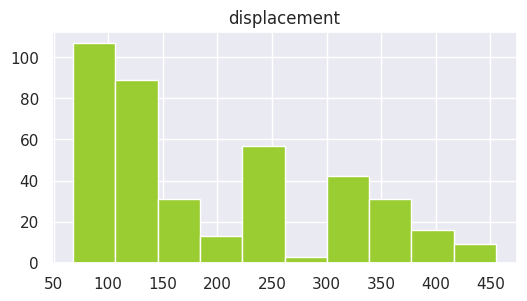

In [ ]:
# visualize the distribution
feature = cols[1]
df[feature].hist(figsize=(6,3),color=color)
plt.title(feature);

# generate bins
disp_bins = da.generate_bins(df, feature, start_adjust=-18, stop_adjust=6, step=50)

Proposed bins: [50, 75, 100, 125, 150, 175, 200, 225]


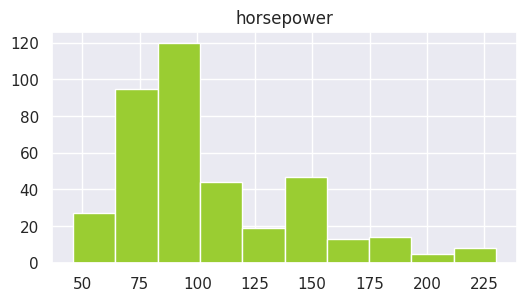

In [ ]:
# visualize the distribution
feature = cols[2]
df[feature].hist(figsize=(6,3),color=color)
plt.title(feature);

# generate bins
horse_bins = da.generate_bins(df, feature, start_adjust=+4, stop_adjust=0, step=25)

Proposed bins: [1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


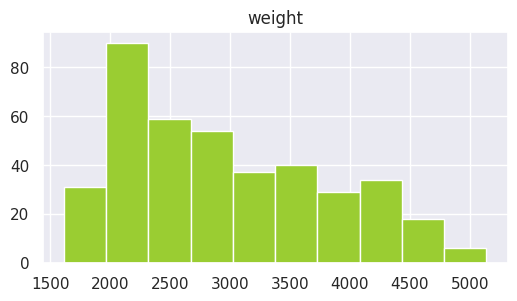

In [ ]:
# visualize the distribution
feature = cols[3]
df[feature].hist(figsize=(6,3),color=color)
plt.title(feature);

# generate bins
weight_bins = da.generate_bins(df, feature, start_adjust=-113, stop_adjust=0, step=500)

In [ ]:
# create bin dictionary
bins = [mpg_bins, disp_bins,horse_bins,weight_bins]
bins_dict = dict(zip(cols,bins))
bins_dict

{'mpg': [5, 10, 15, 20, 25, 30, 35, 40, 45],
 'displacement': [50, 100, 150, 200, 250, 300, 350, 400, 450],
 'horsepower': [50, 75, 100, 125, 150, 175, 200, 225],
 'weight': [1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]}

## Bin the Data

In [ ]:
df = da.bin_data_from_dict(df, bins_dict)
df  # Display the first few rows of the modified DataFrame

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg_bins,displacement_bins,horsepower_bins,weight_bins
0,18.0,8,307.0,130.0,3504,12.0,70,usa,15-20,300-350,125-150,3500-4000
1,15.0,8,350.0,165.0,3693,11.5,70,usa,15-20,350-400,150-175,3500-4000
2,18.0,8,318.0,150.0,3436,11.0,70,usa,15-20,300-350,150-175,3000-3500
3,16.0,8,304.0,150.0,3433,12.0,70,usa,15-20,300-350,150-175,3000-3500
4,17.0,8,302.0,140.0,3449,10.5,70,usa,15-20,300-350,125-150,3000-3500
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,25-30,100-150,75-100,2500-3000
394,44.0,4,97.0,52.0,2130,24.6,82,europe,40-45,50-100,50-75,2000-2500
395,32.0,4,135.0,84.0,2295,11.6,82,usa,30-35,100-150,75-100,2000-2500
396,28.0,4,120.0,79.0,2625,18.6,82,usa,25-30,100-150,75-100,2500-3000


### Plot the new Categorical Data

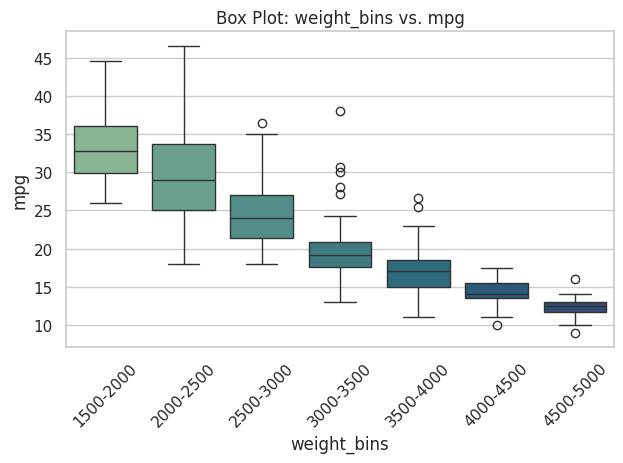

In [ ]:
da.plot_categorical_comparisons(df,'weight_bins', 'mpg',legend=False)

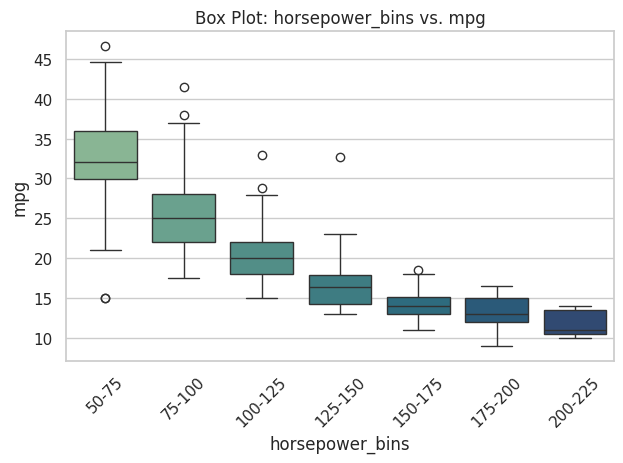

In [ ]:
da.plot_categorical_comparisons(df,'horsepower_bins', 'mpg',legend=False)

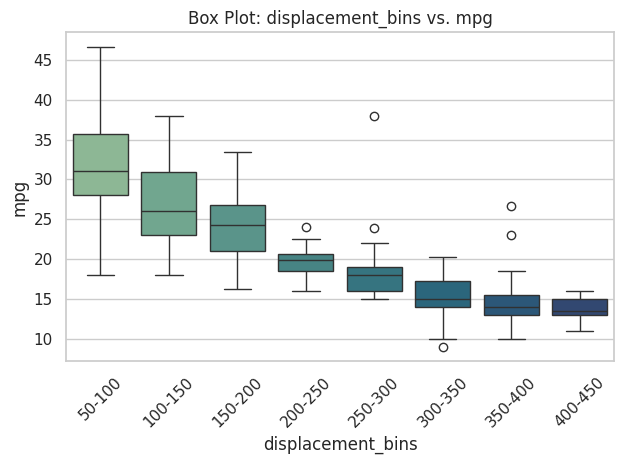

In [ ]:
da.plot_categorical_comparisons(df,'displacement_bins', 'mpg',legend=False)

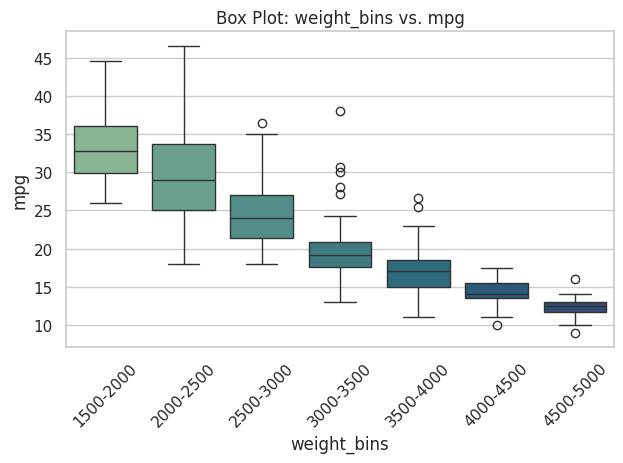

In [ ]:
da.plot_categorical_comparisons(df,'weight_bins', 'mpg',legend=False)